In [39]:
!pip install --upgrade torch

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.3.0+cu100)


In [0]:
%reload_ext autoreload
%matplotlib inline

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import fastai as f
import fastai.vision as fv

In [0]:
path = fv.untar_data(fv.URLs.PETS)

In [9]:
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [12]:
type(path)

pathlib.PosixPath

In [0]:
fnames = fv.get_image_files(path_img)

In [15]:
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_5.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_119.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_106.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_87.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_133.jpg')]

In [0]:
np.random.seed(2)

In [0]:
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = fv.ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=fv.get_transforms(), size=224)

In [26]:
data.normalize(fv.imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Birman,miniature_pinscher,miniature_pinscher,newfoundland,Sphynx
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
basset_hound,english_cocker_spaniel,beagle,Abyssinian,japanese_chin
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

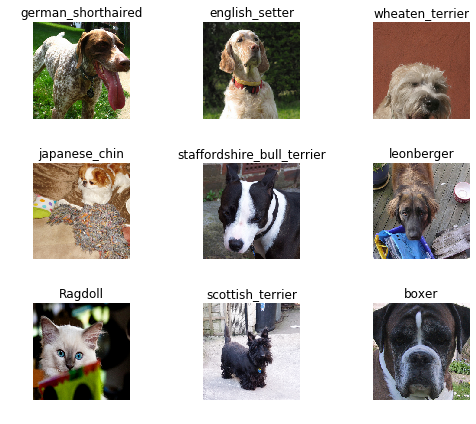

In [27]:
data.show_batch(rows=3, figsize=(7, 6))

In [29]:
print(len(data.classes))

37


In [30]:
data.c

37

In [0]:
model = fv.create_cnn(data, fv.models.densenet121, metrics=error_rate)

In [47]:
model.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.076709,0.311100,0.094723,02:12
1,0.483423,0.250335,0.071719,02:14
2,0.274699,0.217379,0.060893,02:11


In [0]:
model.save('stage-1')

In [0]:
pred = fv.ClassificationInterpretation.from_learner(model)

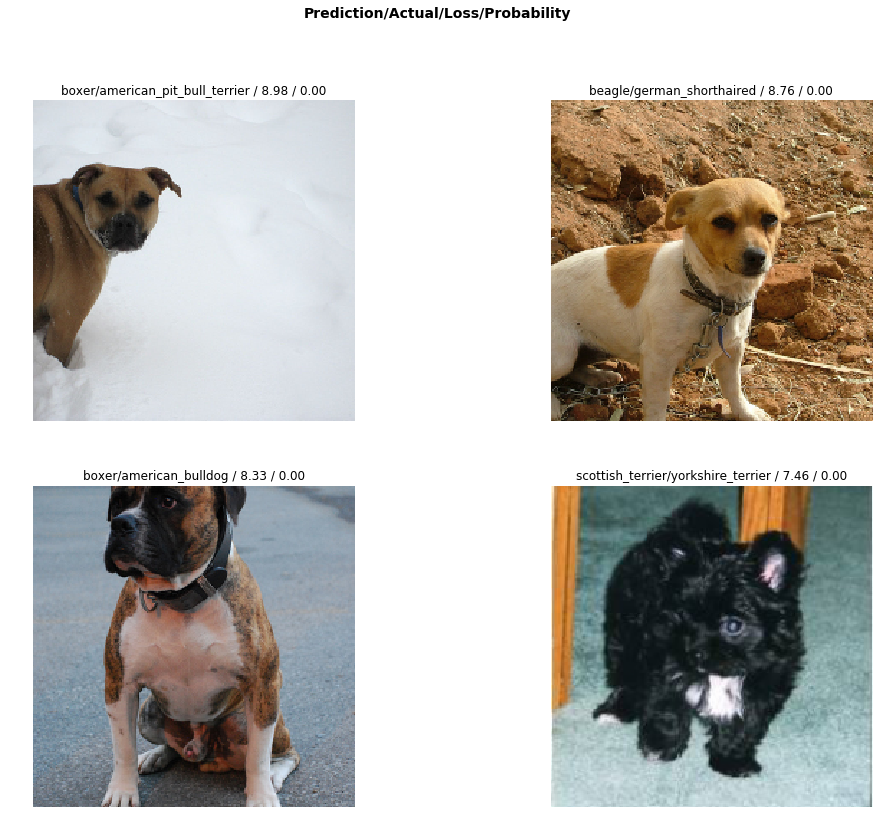

In [55]:
pred.plot_top_losses(4, figsize=(17, 13))

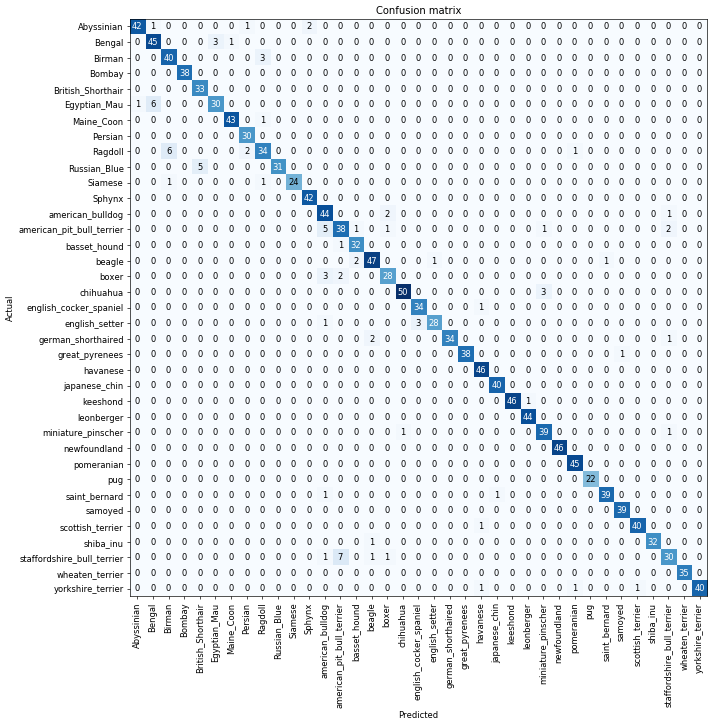

In [60]:
pred.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [61]:
pred.most_confused(min_val=4)

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 7),
 ('Egyptian_Mau', 'Bengal', 6),
 ('Ragdoll', 'Birman', 6),
 ('Russian_Blue', 'British_Shorthair', 5),
 ('american_pit_bull_terrier', 'american_bulldog', 5)]

In [0]:
model.unfreeze()

In [63]:
model.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.498649,0.326959,0.099459,02:27


In [64]:
model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


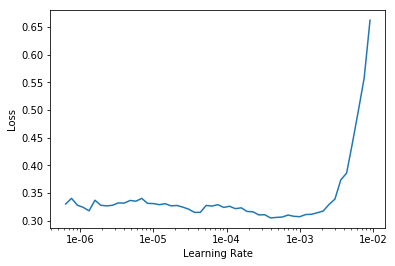

In [65]:
model.recorder.plot()

In [66]:
model.unfreeze()
model.fit_one_cycle(2, max_lr = slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.289163,0.271501,0.080514,02:20
1,0.255157,0.268411,0.075778,02:22
